In [12]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.patches as mpatches
import numpy as np
%matplotlib inline

In [13]:
df = pd.read_csv('training.csv', names=['Timestamp', 'Hour', 'Ad', 'Browser', 'Platform', 'Region', 'Clicked'])

df['Hour'] = df['Timestamp'].apply(lambda x: round(float(x.split(':')[0][-2:]) + \
    float(x.split(':')[1])/60, 0))

df_group = df.drop(['Timestamp', 'Browser', 'Platform'], axis=1).groupby(['Ad', 'Hour', 'Region'], as_index=False).mean()

In [3]:
# Dummy Region to binary features
#df_group = pd.concat([df_group, pd.get_dummies(df_group['Region'])], axis=1).drop('Region', axis=1)

In [4]:
ads = df_group['Ad'].unique()
features = list(df_group.columns)
features.remove('Ad')
features.remove('Clicked')
features.remove('Region')
print features

['Hour']


In [5]:
models_dict = {}
for ad in ads:
    y = df_group[df_group.Ad == ad]['Clicked']
    X = sm.add_constant(df_group[df_group.Ad == ad][features])
    models_dict[ad] = sm.OLS(y, X).fit()

In [6]:
models_dict

{'Candy Smash': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x11439d090>,
 'Clash of Tribes': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x11439d3d0>,
 'NBA Jam': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x11439db10>}

In [ ]:

print df[(df.Ad == 'Candy Smash') & (df.Hour == hour)].Clicked.mean()
print df[(df.Ad == 'NBA Jam') & (df.Hour == hour)].Clicked.mean()
print df[(df.Ad == 'Clash of Tribes') & (df.Hour == hour)].Clicked.mean()

In [ ]:
df_group.head()

In [9]:
# Convert Catigorical string to ints for modeling.
for col in ['Region']:
    catigories = list(df_group[col].unique())
    df_group[col] = df_group[col].apply(lambda x: catigories.index(x))

In [10]:
model = LinearRegression()
model.fit()

TypeError: fit() takes at least 3 arguments (1 given)

/Users/charleslynn/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


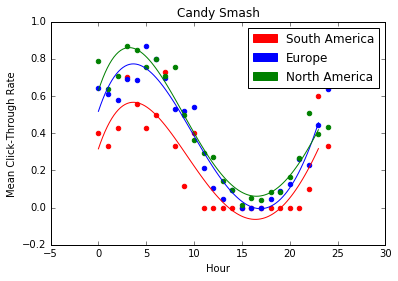

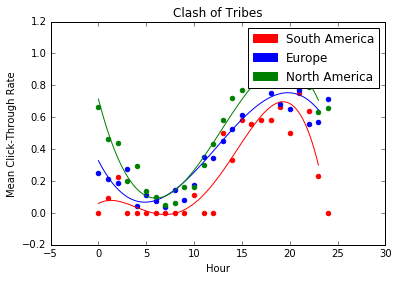

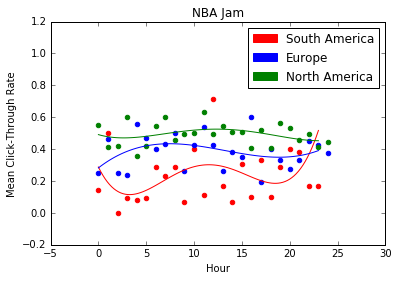

In [14]:
ad = 'Candy Smash'
region = 'North America'

for ad in df.Ad.unique():
    legend_handles = []
    for region, color in zip(df.Region.unique(), ['red', 'blue', 'green']):

        X = df_group[(df_group.Ad == ad) & (df_group.Region == region)]['Hour'].reshape(-1,1)
        y = df_group[(df_group.Ad == ad) & (df_group.Region == region)]['Clicked']
        
        poly = PolynomialFeatures(degree=4)
        poly.fit(X)
        X_poly = poly.transform(X)
        model = LinearRegression()
        model.fit(X_poly, y)
        
        legend_handles.append(mpatches.Patch(color=color, label=region))
        plt.scatter(X, y, color=color)

        linspace = np.linspace(0, 23, 100).reshape(-1,1)
        plt.plot(linspace, model.predict(poly.transform(linspace)), color=color)
    
    plt.title(ad)
    plt.xlabel('Hour')
    plt.ylabel('Mean Click-Through Rate')
    plt.legend(handles=legend_handles)
    plt.show()

/Users/charleslynn/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/charleslynn/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


0.744628032149
0.771433461365
0.203358563347


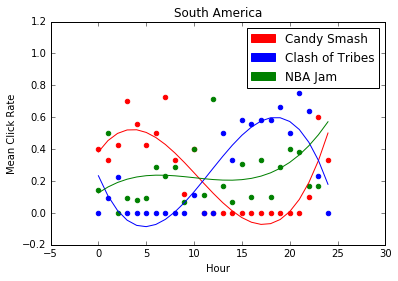

0.918727219116
0.895873184079
0.123537180799


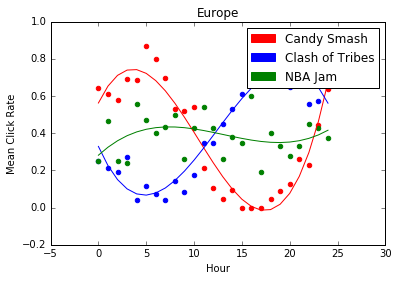

0.908442108871
0.951331761127
0.0907322710556


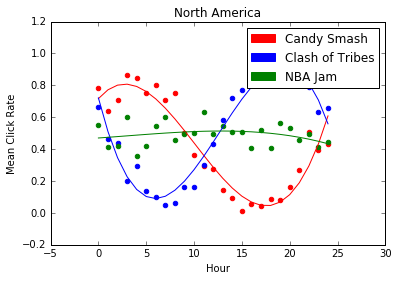

0.813240130199
0.87955021397
0.0413582356074


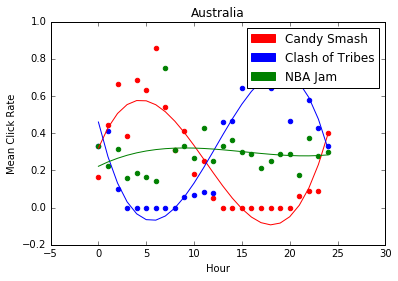

0.462629441741


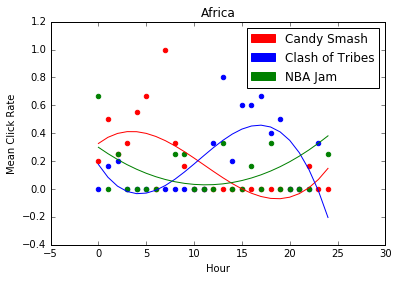

0.844142204989
0.787259401039
0.0197028679461


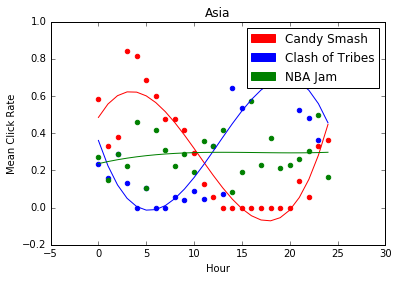

0


In [18]:
R_squared = []

for region in df.Region.unique():
    legend_handles = []
    for ad, color in zip(df.Ad.unique(), ['red', 'blue', 'green']):

        X = df_group[(df_group.Ad == ad) & (df_group.Region == region)]['Hour'].reshape(-1,1)
        y = df_group[(df_group.Ad == ad) & (df_group.Region == region)]['Clicked']
        
        poly = PolynomialFeatures(degree=3)
        poly.fit(X)
        X_poly = poly.transform(X)
        model = LinearRegression()
        model.fit(X_poly, y)
        
        legend_handles.append(mpatches.Patch(color=color, label=ad))
        plt.scatter(X, y, color=color)

        linspace = np.linspace(0, 24, 25).reshape(-1,1)
        y_pred = model.predict(poly.transform(linspace))
        plt.plot(linspace, y_pred, color=color)
        
        # Calculate R^2
        if y.reshape(-1,1).shape == y_pred.reshape(-1,1).shape:
            print r2_score(y, y_pred, sample_weight=None, multioutput=None)


    plt.title(region)
    plt.xlabel('Hour')
    plt.ylabel('Mean Click Rate')
    plt.legend(handles=legend_handles)
    plt.show()
print len(R_squared)
#print float(sum(R_squared))/len(R_squared)

In [ ]:
np.array([5, 10, 12]).shape

In [ ]:
ad = 'Candy Smash'
region = 'North America'

for ad in df.Ad.unique():
    legend_handles = []
    for region, color in zip(df.Region.unique(), ['red', 'blue', 'green']):

        X = df_group[(df_group.Ad == ad) & (df_group.Region == region)]['Hour'].reshape(-1,1)
        y = df_group[(df_group.Ad == ad) & (df_group.Region == region)]['Clicked']
        
        poly = PolynomialFeatures(degree=4)
        poly.fit(X)
        X_poly = poly.transform(X)
        model = LinearRegression()
        model.fit(X_poly, y)
        
        legend_handles.append(mpatches.Patch(color=color, label=region))
        plt.scatter(X, y, color=color)

        linspace = np.linspace(0, 23, 100).reshape(-1,1)
        plt.plot(linspace, model.predict(poly.transform(linspace)), color=color)
    
    plt.title(ad)
    plt.xlabel('Hour')
    plt.ylabel('Mean Click-Through Rate')
    plt.legend(handles=legend_handles)
    plt.show()